In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import cancer data from the Sklearn library.
#Dataset can also be found here

from sklearn.datasets import load_breast_cancer
dataset = pd.read_csv('/home/inlab/Downloads/trainINLAB.csv')

In [2]:
dataset.head()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime,HandoverResult
0,22.0,35.0,7.2500,100.0,34,0
1,38.0,54.0,71.2833,160.0,6,1
2,26.0,58.0,88.0000,165.0,9,1
3,35.0,55.0,53.1000,170.0,43,1
4,28.0,34.0,8.4583,80.0,18,0


<AxesSubplot:>

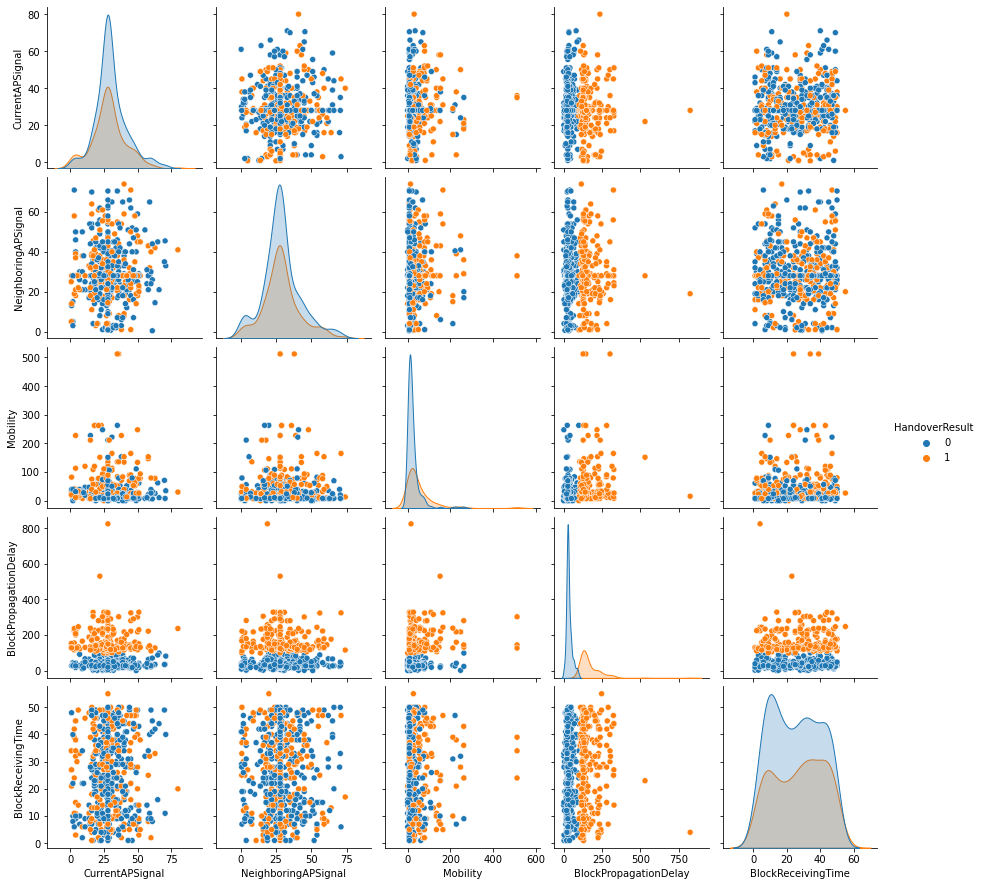

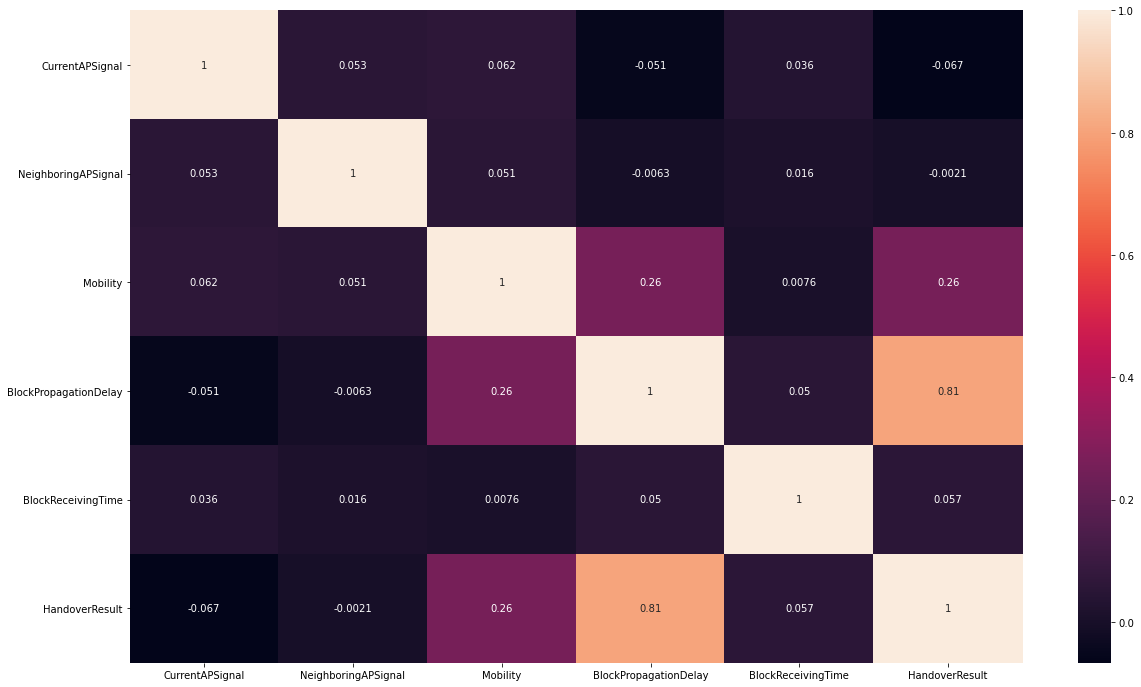

In [3]:
sns.pairplot(dataset, hue = 'HandoverResult', vars = ['CurrentAPSignal','NeighboringAPSignal','Mobility','BlockPropagationDelay','BlockReceivingTime'])
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(), annot=True)

In [4]:
X = dataset.drop(['HandoverResult'], axis=1)#drop the targer feature and use all the remaining features in our datafile
X.head()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime
0,22.0,35.0,7.2500,100.0,34
1,38.0,54.0,71.2833,160.0,6
2,26.0,58.0,88.0000,165.0,9
3,35.0,55.0,53.1000,170.0,43
4,28.0,34.0,8.4583,80.0,18


In [5]:
y = dataset['HandoverResult']
y.head()


0    0
1    1
2    1
3    1
4    0
Name: HandoverResult, dtype: int64

TypeError: only size-1 arrays can be converted to Python scalars

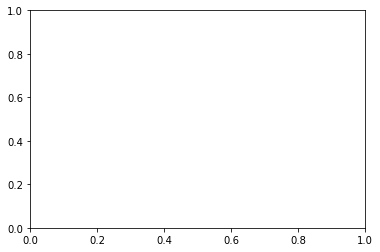

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C=1.0, cache_size=200,class_weight=None, coef0=0.0,decision_function_shape='ovr',degree=3,gamma='auto',kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)

svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

In [ ]:
#Import metric libraries
#This is to check the accuracy of the prediction by comparing it to the output we already have.
#Use the confusion matrix for this comparison
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_notLeave', 'is_Leave'],
                    columns=['predicted_notLeave','predicted_Leave'])
confusion

In [ ]:
print(classification_report(y_test, y_predict))
#The accuracy is really low only 44%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['CurrentAPSignal','NeighboringAPSignal','Mobility','BlockPropagationDelay','BlockReceivingTime']
n_classes = 4
n_features = len(features_names)

clf_coef_ = np.random.randint(1, 30, size=(int(0.5*n_classes*(n_classes-1)), n_features))

f_importances(clf_coef_.sum(axis=0), features_names)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['CurrentAPSignal','NeighboringAPSignal','Mobility','BlockPropagationDelay','BlockReceivingTime']
n_classes = 4
n_features = len(features_names)

clf_coef_ = np.random.randint(1, 30, size=(int(0.5*n_classes*(n_classes-1)), n_features))

f_importances(clf_coef_.sum(axis=0), features_names)

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=5):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(['CurrentAPSignal','NeighboringAPSignal','Mobility','BlockPropagationDelay','BlockReceivingTime'])
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(dataset.drop(['HandoverResult'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC().fit(X, y)
feature_plot(trainedsvm, dataset.drop(['HandoverResult'], axis = 1).columns.values)